In [1]:
from simphony.libraries import siepic
from simphony.die import Die
from simphony.simulation import Simulation, Laser, Detector
from phidl import quickplot, set_quickplot_options

In [2]:
def ring_factory(radius, die):
  """Creates a full ring (with terminator) from a half ring.

  Resulting pins are ('pass', 'in', 'out').

  Parameters
  ----------
  radius : float
      The radius of the ring resonator, in meters.
  """
  # Have rings for selecting out frequencies from the data line.
  # See SiPANN's model API for argument order and units.
  halfring1 = siepic.HalfRing(radius=radius, die=die, name="hr1")
  halfring2 = siepic.HalfRing(radius=radius, die=die, name="hr2")
  terminator = siepic.Terminator(die=die, name="termpart")

  halfring1.rename_pins("midb", "pass", "midt", "in")
  halfring2.rename_pins("midt", "out", "midb", "term")

  # the interface method will connect all of the pins with matching names
  # between the two components together
  halfring1.interface(halfring2)
  halfring2["term"].connect(terminator)

  # bundling the circuit as a Subcircuit allows us to interact with it
  # as if it were a component
  return halfring1.circuit.to_subcircuit(name="sub")

In [3]:
die = Die(name="die1")
wg_input = siepic.Waveguide(name="wginput", length=100e-6, die=die)
wg_out1 = siepic.Waveguide(name="wgoutput1", length=100e-6, die=die)
wg_connect1 = siepic.Waveguide(name="wgc1", length=100e-6, die=die)
wg_out2 = siepic.Waveguide(name="wg_output2", length=100e-6, die=die)
wg_connect2 = siepic.Waveguide(name="wg_c2", length=100e-6, die=die)
wg_out3 = siepic.Waveguide(name="wg_output3", length=100e-6, die=die)
terminator = siepic.Terminator(name="term")

ring1 = ring_factory(10e-6, die)
ring1.name = "ring1"
ring2 = ring_factory(11e-6, die)
ring2.name = "ring2"
ring3 = ring_factory(12e-6, die)
ring3.name = "ring3"
die.device_list

wginput model defined device

wginput model defined device ref

wgoutput1 model defined device

wgoutput1 model defined device ref

wgc1 model defined device

wgc1 model defined device ref

wg_output2 model defined device

wg_output2 model defined device ref

wg_c2 model defined device

wg_c2 model defined device ref

wg_output3 model defined device

wg_output3 model defined device ref

term model defined device

term model defined device ref

hr1 model defined device

hr1 model defined device ref

hr2 model defined device

hr2 model defined device ref



C:\Users\s39chand\AppData\Roaming\Python\Python310\site-packages\simphony\libraries\siepic\__init__.py:441: UserWarning: Exact parameters not available for '<class 'simphony.libraries.siepic.HalfRing'>', using closest approximation (results may not be as accurate).
Requested: {'gap': 3e-08, 'radius': 1e-05, 'width': 5e-07, 'thickness': 2.2e-07, 'couple_length': 0.0}
Selected:  {'gap': 1e-07, 'radius': 1e-05, 'width': 5e-07, 'thickness': 2.2e-07, 'couple_length': 0.0}
NOTE: Model attributes may have been automatically modified.
  warnings.warn(msg, UserWarning)


termpart model defined device

termpart model defined device ref

[Device (name "wginput" (uid 1), ports ['pin1', 'pin2'], aliases [], 1 polygons, 0 references), Device (name "wgoutput1" (uid 5), ports ['pin1', 'pin2'], aliases [], 1 polygons, 0 references), Device (name "wgc1" (uid 9), ports ['pin1', 'pin2'], aliases [], 1 polygons, 0 references), Device (name "wg_output2" (uid 13), ports ['pin1', 'pin2'], aliases [], 1 polygons, 0 references), Device (name "wg_c2" (uid 17), ports ['pin1', 'pin2'], aliases [], 1 polygons, 0 references), Device (name "wg_output3" (uid 21), ports ['pin1', 'pin2'], aliases [], 1 polygons, 0 references), Device (name "hr1" (uid 27), ports ['pin1', 'pin2', 'pin3', 'pin4'], aliases [], 1 polygons, 0 references), Device (name "hr2" (uid 31), ports ['pin1', 'pin2', 'pin3', 'pin4'], aliases [], 1 polygons, 0 references), Device (name "termpart" (uid 35), ports ['pin1'], aliases [], 1 polygons, 0 references)]
[Device (name "wgoutput1" (uid 5), ports ['pin1', 'p

C:\Users\s39chand\AppData\Roaming\Python\Python310\site-packages\simphony\libraries\siepic\__init__.py:441: UserWarning: Exact parameters not available for '<class 'simphony.libraries.siepic.HalfRing'>', using closest approximation (results may not be as accurate).
Requested: {'gap': 3e-08, 'radius': 1.1e-05, 'width': 5e-07, 'thickness': 2.2e-07, 'couple_length': 0.0}
Selected:  {'gap': 1e-07, 'radius': 1e-05, 'width': 5e-07, 'thickness': 2.2e-07, 'couple_length': 0.0}
NOTE: Model attributes may have been automatically modified.
  warnings.warn(msg, UserWarning)


[Device (name "hr2" (uid 31), ports ['pin1', 'pin2', 'pin3', 'pin4'], aliases [], 1 polygons, 0 references), Device (name "sub" (uid 37), ports ['pass', 'in', 'out'], aliases [], 1 polygons, 0 references), Device (name "hr1" (uid 39), ports ['pin1', 'pin2', 'pin3', 'pin4'], aliases [], 1 polygons, 0 references), Device (name "hr2" (uid 43), ports ['pin1', 'pin2', 'pin3', 'pin4'], aliases [], 1 polygons, 0 references), Device (name "termpart" (uid 47), ports ['pin1'], aliases [], 1 polygons, 0 references)]
[Device (name "sub" (uid 37), ports ['pass', 'in', 'out'], aliases [], 1 polygons, 0 references), Device (name "hr2" (uid 43), ports ['pin1', 'pin2', 'pin3', 'pin4'], aliases [], 1 polygons, 0 references)]
[Device (name "hr2" (uid 43), ports ['pin1', 'pin2', 'pin3', 'pin4'], aliases [], 1 polygons, 0 references)]
sub model defined device

sub model defined device ref

hr1 model defined device

hr1 model defined device ref

hr2 model defined device

hr2 model defined device ref

termpa

C:\Users\s39chand\AppData\Roaming\Python\Python310\site-packages\simphony\libraries\siepic\__init__.py:441: UserWarning: Exact parameters not available for '<class 'simphony.libraries.siepic.HalfRing'>', using closest approximation (results may not be as accurate).
Requested: {'gap': 3e-08, 'radius': 1.2e-05, 'width': 5e-07, 'thickness': 2.2e-07, 'couple_length': 0.0}
Selected:  {'gap': 1e-07, 'radius': 1e-05, 'width': 5e-07, 'thickness': 2.2e-07, 'couple_length': 0.0}
NOTE: Model attributes may have been automatically modified.
  warnings.warn(msg, UserWarning)


[Device (name "sub" (uid 61), ports ['pass', 'in', 'out'], aliases [], 1 polygons, 0 references)]

In [4]:
ring1.multiconnect(wg_connect1, wg_input["pin2"], wg_out1)
ring2.multiconnect(wg_connect2, wg_connect1, wg_out2)
ring3.multiconnect(terminator, wg_connect2, wg_out3)

[]


In [5]:
ring1.die
die.device_list

[]

In [6]:
[pin.name for pin in ring1.circuit.pins]

 model defined device

 model defined device ref



['pin1', 'pin2', 'pin2', 'pin2']

In [12]:
die.device_list

[Device (name "" (uid 65), ports ['pin1', 'pin2'], aliases [], 1 polygons, 0 references)]

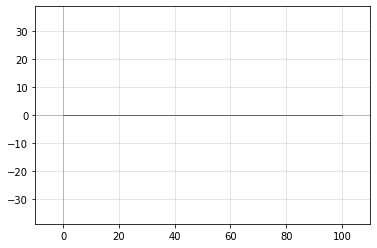

In [9]:
set_quickplot_options(show_ports=False, show_subports=False)
quickplot(die.device_list)